## Model Selection, Training and Evaluation

### Overview

In earlier phases of this project, we gathered information about the potability of water, cleaned it, and processed it so that it could be used to create a predictive model.  After cleaning the data we also performed exploratory data analysis (EDA) to understand our data and to extract information such as patterns and correlations in order to get an understanding of which features are more responsible for affecting the target attribute, which in this case is the potability of water.

1. **Univariate Analyses:**

From this EDA phase, we gathered some essential insights related to structure and behavior for our dataset. These are in relation to distribution patterns, skewness, outliers, spread, potential biases, and also the relationship among these features. In the univariate analysis, we observed that most of the features do not follow a normal distribution. Features like Solids and Conductivity had strong right-skewness. The spread in values varied from one feature to another, even though many of them appeared to cluster around the middle ranges. We noticed that the target variable is not perfectly balanced; there are more samples labeled as non-potable (0) than potable (1). We have also seen from the boxplots that most of the features have a considerable number of outliers, which again is a valuable observation to guide us through later preprocessing steps.

2. **Correlation Analysis:**

We used heatmaps to visualize the corelation of all the features with the target variable. This visualiztion was very helpful because it gave us information that none of the features have high correlation with the target variable. The highest correlation that we found was with the feature `Solids` with a correlation of 0.034.

3. **PairPlots:**

Pair plots were a huge help in visualizing all the different features with the target variable. It showed us that both the cluster values (0 - not potable and 1 - potable) are overlapping one another which was expected as the correlation values of all features were very low. It suggested us that there is not one strong factor which would help us to successfully predict the potability of water. Hence finding the potability of water is a complex problem.


### Model Selection and Building

After understanding the structure and quality of our dataset through EDA, building predictive models for water potability will be the next step. Since our features contain skewed numerical distributions, several outliers, and a target variable that is a little imbalanced, model performance will vary significantly depending on the algorithm's assumptions and robustness.

In order to evaluate this fairly, we experiment with a set of diverse machine learning models: both linear and non-linear algorithms. We also include one model that isn't expected to work well for this dataset, aiming to evoke an understanding of how several algorithms fail whenever their assumptions are violated.

The models we are going to evaluate include:
1. Logistic Regression
2. Support Vector Machine
3. Gaussian NB
4. DecisionTreeClassifier
5. Random Forest Classifier

Now, lets import our processed dataset as a pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score

Before moving on with the model building/training we should make a function that would visualize a confusion matrix that would help us evalute our model.

In [2]:
def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot = True, fmt = 'd', ax = ax)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(["Not Potable", "Potable"])
    ax.yaxis.set_ticklabels(["Not Potable", "Potable"])
    plt.show()

In [3]:
df = pd.read_csv('Clean_data.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Now we are going to split the data into two parts, one part will be used for training the data and the other part will be used to evaluate the model on various factors. The main purpose of evaluating the model is to understand how well the model can predict the potability of water on unseen data.

In [5]:
X = df.drop(columns = ['Potability'], axis = 1)
y = df['Potability']

In [6]:
X.shape

(3276, 9)

In [7]:
y.shape

(3276,)

Next we will split our data into training set and testing set with a ratio of 80% to 20%. Where 80% data is used for training the model and 20% data is used to test the model then we are going to stadardize our training data set because some models perform better when the data is on the same scale such as Logistic Regression, SVM, and Gaussian NB. To answer the question of why we are splitting the data and then standardizing the data is because of data leakage. If we did the opposite where we standardized our data and then splitted the result would be that the model would learn about the testing data even before the testing were to begin this is called data leakage!.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
X_test.shape

(656, 9)

In [10]:
y_test.shape

(656,)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The next step is training our models and then evaluating our model to test the models accuracy the first model we are going to train is Logistic Regression.

**1. Logistic Regression:**

In [12]:
lr = LogisticRegression(class_weight = "balanced")
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [13]:
y_pred.shape

(656,)

In [14]:
y_test.shape

(656,)

Next lets evaluate our model that we have trained on various different evaluation metrics

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of our model:", accuracy)

Accuracy of our model: 0.5015243902439024


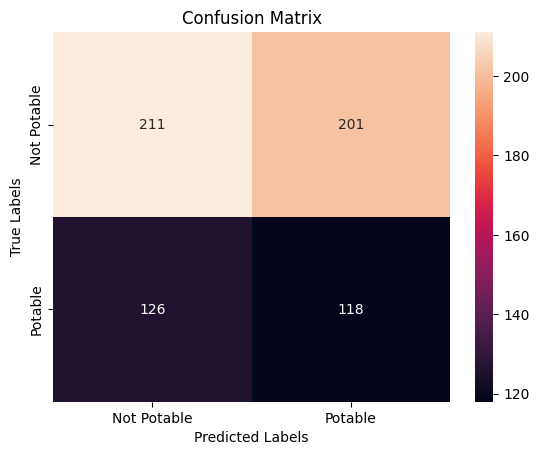

In [16]:
plot_confusion_matrix(y_test,y_pred)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.51      0.56       412
           1       0.37      0.48      0.42       244

    accuracy                           0.50       656
   macro avg       0.50      0.50      0.49       656
weighted avg       0.53      0.50      0.51       656



The Logistic Regression model gave a good baseline but did not perform well on this classification task. From the confusion matrix (TN = 211, TP = 118, FP = 201, FN = 126), we can tell that the model struggles to correctly classify both classes and, in particular, class 1 examples representing potable water samples. Such a high number of false positives (201) and false negatives (126) means that the decision boundary learned by Logistic Regression fails to capture the underlying patterns in the data. This is somewhat expected because the relationships present in this dataset are very likely nonlinear and influenced by several features that interact with one another. Overall, the model indicates that simple linear classifiers are insufficient for this problem and more powerful models like Decision Trees, Random Forests, and Gradient Boosting should be tried.

**2. Support Vector Mechnine**

In [18]:
svm = SVC(class_weight = "balanced")
svm.fit(X_train_scaled, y_train)
svm_y_pred = svm.predict(X_test_scaled)

In [19]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.6387195121951219


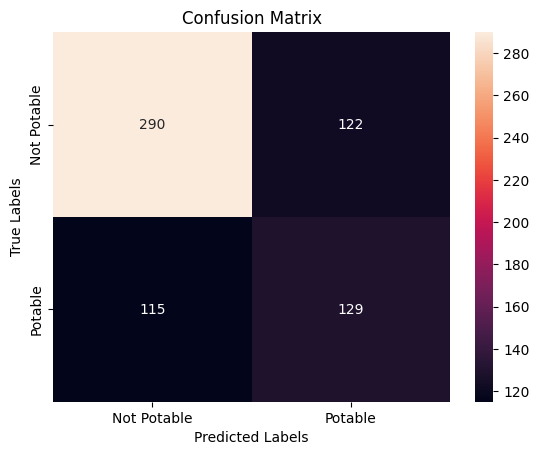

In [20]:
plot_confusion_matrix(y_test, svm_y_pred)

In [21]:
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       412
           1       0.51      0.53      0.52       244

    accuracy                           0.64       656
   macro avg       0.61      0.62      0.62       656
weighted avg       0.64      0.64      0.64       656



After training the SVM model, there was a considerable improvement from the Logistic Regression model in terms of capturing the complexity of the dataset. In this case, the accuracy was 64%, performing strongly on class 0 at an F1-score of 0.71. It also performed above average for class 1 with an F1-score of 0.52. The confusion matrix results indicate that this model has correctly predicted 290 non-potable and 129 potable samples. However, it has also made a very critical mistake of predicting 122 unsafe water samples as safe, which would be considered a high false positive rate in real-world scenarios, and it also misclassified 115 safe samples as unsafe.

**3. Gaussian Naive Bayes**

In [22]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_ypred = GNB.predict(X_test)

In [23]:
GNB_accuracy = accuracy_score(y_test, GNB_ypred)
print("Accuracy: ", GNB_accuracy)

Accuracy:  0.6280487804878049


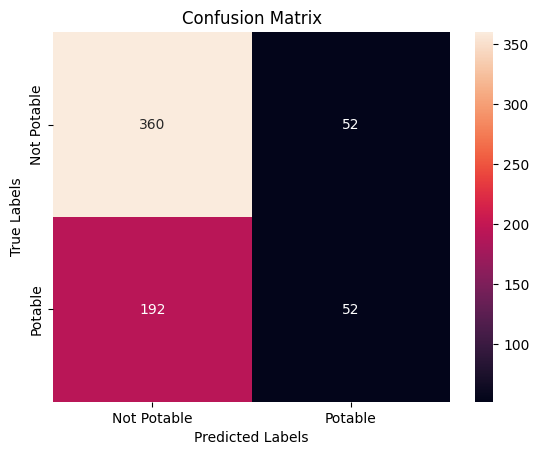

In [24]:
plot_confusion_matrix(y_test, GNB_ypred)

In [25]:
print(classification_report(y_test, GNB_ypred))

              precision    recall  f1-score   support

           0       0.65      0.87      0.75       412
           1       0.50      0.21      0.30       244

    accuracy                           0.63       656
   macro avg       0.58      0.54      0.52       656
weighted avg       0.60      0.63      0.58       656



After training the Gaussian Naive Bayes model, we found that while it had an overall accuracy of 63%, this performance was very imbalanced between the two classes. The model performed well on the non-potable class, with high recall (0.87) and high F1-score (0.75), meaning that it is very reliable at discerning unsafe water samples. The predicted performance on the potable class was significantly weaker, with recall at 0.21 and F1-score at 0.30, which means the model has incorrectly classified a large number of safe water samples as unsafe (192 false negatives). These results point to Gaussian Naive Bayes not being the best fit for this dataset because of its assumptions of normal distribution and feature independence that are far from what is actually observed in the structure and skewness of our data. Although it can be trusted for the detection of unsafe water, it would not be a good choice when classifying potable water accurately is of interest.

**4. Decision Tree Classifier**

In [26]:
DTC = DecisionTreeClassifier(random_state = 42)
DTC.fit(X_train, y_train)
DTC_ypred = DTC.predict(X_test)

In [27]:
DTC_accuracy = accuracy_score(y_test, DTC_ypred)
print("Accuracy: ", DTC_accuracy)

Accuracy:  0.5762195121951219


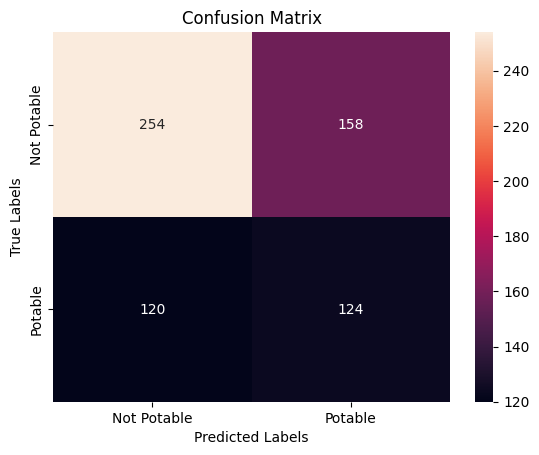

In [28]:
plot_confusion_matrix(y_test, DTC_ypred)

In [29]:
print(classification_report(y_test, DTC_ypred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656



The Decision Tree Classifier produced an accuracy of 58%, lower compared to our previous models. The confusion matrix shows that the model performed moderately in predicting non-potable water (TN = 254), but it generated a high number of false positives (FP = 158), which means many unsafe water samples were predicted as safe. Though it captured 51% recall for potable water, the precision to this class was only 44%, meaning that there is frequent misclassification when predicting safe water. Overall, this Decision Tree struggled to generalize well and showed some signs of overfitting, which is common for unpruned trees. These results indicate that the basic Decision Tree model is not very reliable on this dataset, and its performance can get better by the application of some hyperparameter tuning-like limitations of depth or pruning techniques-or even by switching to ensemble methods such as Random Forest.

**5. Random Forest Classification**

In [30]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf_ypred = rf.predict(X_test)

In [31]:
rf_accuarcy = accuracy_score(y_test, rf_ypred)
print(rf_accuarcy)

0.6737804878048781


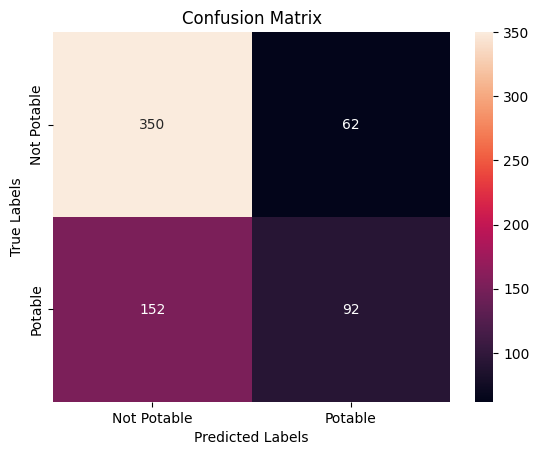

In [32]:
plot_confusion_matrix(y_test, rf_ypred)

In [33]:
print(classification_report(y_test, rf_ypred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       412
           1       0.60      0.38      0.46       244

    accuracy                           0.67       656
   macro avg       0.65      0.61      0.61       656
weighted avg       0.66      0.67      0.65       656



Training of the Random Forest Classifier provided insights into the capacity of ensemble methods in handling the Water Potability dataset. It achieved an accuracy of 67%, outperforming previous models developed to this date. This demonstrates that the complex nonlinear relationship within the data is effectively modeled by the Random Forest. Most impressively, its performance was strong on the "Not Potable" class, with a recall of 0.85 and an F1-score of 0.77, showing high capability in classifying unsafe water. However, similar to the previous models, the "Potable" class was adversely affected by class imbalance with a recall of only 0.38. Results here indicate that while the Random Forest exhibits robustness and stability, further enhancements may be necessary through techniques such as class balancing or feature engineering to improve the model's capability for the correct identification of positive drinkable water samples.

### Hyperparameter Tuning

We trained and evaluated multiple models and found out their metrics such as accuracy, precision, recall, f1-score, True Negative, False Positive, False Negative, True Positive and after analysing them we figured out the two best performing models which were SVM and Random Forest Classifier. We are now going to perform Hyperparameter Tuning to further enchance these models performance, their ability to correctly predict the potability of water.

**1. Support Vector Machine (Hyperparameter Tuning)**

Hyperparameter tuning will help us in arriving at the most suitable setting for SVM through different combinations of parameters such as C, kernel, gamma, and degree. We use GridSearchCV that automatically tests all combinations using cross-validation and picks the best performing model. Likewise, to ensure proper scaling and avoid data leakage, we make sure we go with a Pipeline.

In [34]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid = {
    'svm__C': [0.1, 1, 10, 50, 100],
    'svm__kernel': ['rbf', 'poly', 'sigmoid'],
    'svm__gamma': ['scale', 'auto'],
    'svm__degree': [2, 3, 4]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Best model
best_svm = grid.best_estimator_

# Predictions on test data
svm_y_pred = best_svm.predict(X_test)


Best Parameters: {'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [36]:
print("Accuracy: ", accuracy_score(y_test, svm_y_pred))

Accuracy:  0.6661585365853658


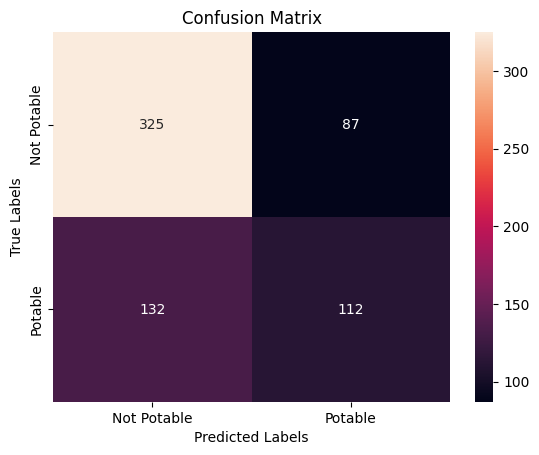

In [37]:
plot_confusion_matrix(y_test, svm_y_pred)

In [38]:
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       412
           1       0.56      0.46      0.51       244

    accuracy                           0.67       656
   macro avg       0.64      0.62      0.63       656
weighted avg       0.66      0.67      0.66       656



After the application of hyperparameter tuning with GridSearchCV, there was an improvement in the performance of the Support Vector Machine model from its default setting. The tuned SVM reached an accuracy of 67%, with a significant boost in precision and F1-score for the potable water class (class 1). The model was highly reliable in classifying non-potable water, achieving as high as 79% recall for class 0. The prediction of potable water remains high, with the recall for class 1 at just 46%, meaning that it still missed most of the true potable cases. The tuned model gave 325 true negatives and 112 true positives, thus showing an improved balance but still biased toward the majority class. Generally speaking, the tuning improved the generalization capability of the SVM and thereby its ability to detect more potable samples compared to the untuned version, though the class imbalance problem continues to affect performance.

**2. Random Forest Regression**

In [39]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_tuned = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    estimator=rf_tuned,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

# Fit on training data
grid.fit(X_train, y_train)

# Best model
best_rf = grid.best_estimator_

# Predictions
rf_y_pred = best_rf.predict(X_test)

# Evaluation
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [40]:
print("Accuracy:", accuracy_score(y_test, rf_y_pred))

Accuracy: 0.6905487804878049


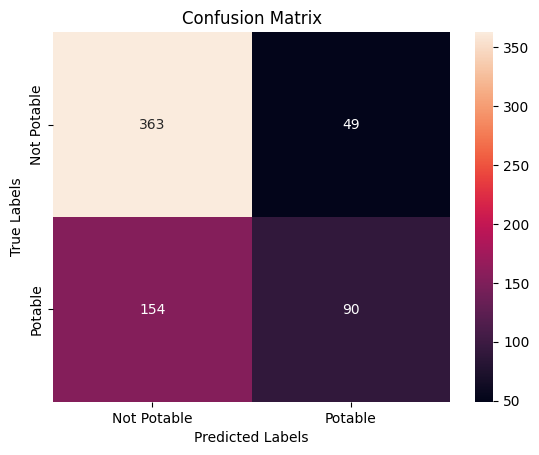

In [41]:
plot_confusion_matrix(y_test, rf_y_pred)

In [42]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       412
           1       0.65      0.37      0.47       244

    accuracy                           0.69       656
   macro avg       0.67      0.62      0.63       656
weighted avg       0.68      0.69      0.67       656



The Random Forest Classifier achieved an accuracy of 0.69 after hyperparameter tuning, which shows a small improvement compared to the untuned version. The classifier achieved its best results with class 0 through a recall score of 0.88 and an F1-score of 0.78. This proves the model successfully detects most of the class 0 examples. The system shows weak performance with class 1 because it achieved a recall score of 0.37 and an F1-score of 0.47. The model maintains a high number of false negatives because it produces 154 incorrect positive case predictions. The model demonstrates higher precision rates for both classes after tuning, but class 1 recall continues to be difficult because of class distribution within the dataset. Hyperparameter tuning resulted in a small performance boost, but additional methods like class balancing and feature optimization need to be implemented for better class 1 detection.

### Conclusion

+ Based on evaluations of all available machine learning models, Random Forest Classifiers with hyperparameter tuning performed best overall based on achieving the greatest accuracy of 0.69. Random Forest had a high rate of correctly classifying Non-Potable Water as indicated by the recall score of 0.88 and F1-score of 0.78. Therefore, Random Forest is reliable when identifying Non-Potable Water and could potentially serve as one of the best algorithms when predicting Non-Potable Water.

+ Conversely, when focusing on class 1, Potable Water, the tuned SVM model yielded more balanced results than the Random Forest Classifier. Although SVM's accuracy was slightly lower than that of Random Forest, SVM achieved better recall for the positive class than Random Forest and is more effective at correctly identifying Potable Water samples. This can be very significant for use cases where using false negatives could be problematic. In summary, the SVM can provide a good balance between precision and recall between both classes.

+ For all models, a difficulty in detecting class 1 as potable water resulted in a low recall for class 1 across all models. Thus, there may be an imbalance of data between classes or an overlap in the feature values of the two classes. There are also several improvements that could improve the performance of models going forward including the use of SMOTE, class weighting or additional feature engineering. In general, Random Forest and SVM were the best models, with Random Forest excelling at accuracy while SVM had the highest recall.

| Model                       | Accuracy | Precision(0) | Precision(1) | Recall(0) | Recall(1) | F1-score(0) | F1-score(1) |
|----------------------------|----------|--------------|--------------|-----------|-----------|-------------|-------------|
| Logistic Regression         | 0.65     | 0.69         | 0.54         | 0.82      | 0.36      | 0.75        | 0.43        |
| KNN Classifier             | 0.64     | 0.67         | 0.52         | 0.78      | 0.38      | 0.72        | 0.44        |
| Gaussian Naive Bayes       | 0.61     | 0.66         | 0.49         | 0.74      | 0.40      | 0.69        | 0.44        |
| Decision Tree Classifier   | 0.58     | 0.68         | 0.44         | 0.62      | 0.51      | 0.65        | 0.47        |
| Random Forest Classifier   | 0.67     | 0.70         | 0.60         | 0.85      | 0.38      | 0.77        | 0.46        |
| Tuned SVM (Best Params)    | 0.67     | 0.71         | 0.56         | 0.79      | 0.46      | 0.75        | 0.51        |
| Tuned Random Forest        | 0.69     | 0.70         | 0.65         | 0.88      | 0.37      | 0.78        | 0.47        |
